In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Setting up data frame

In [3]:
student_performace = pd.read_csv('Student_Performance.csv')
student_performace['Extracurricular Activities'] = np.where(student_performace['Extracurricular Activities'] == "Yes" , 1 ,0)

# Reg Stuff

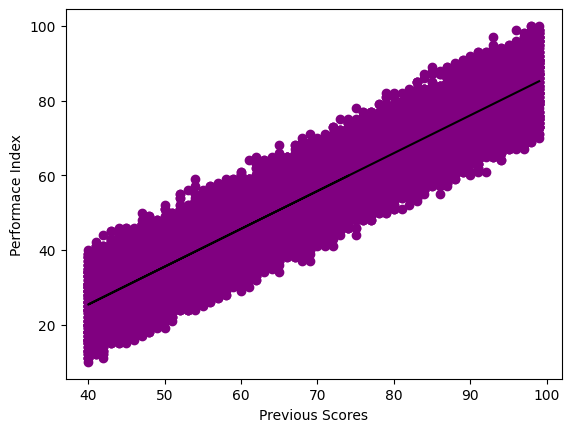

In [9]:
reg = LinearRegression()

feature = student_performace.drop("Performance Index",axis=1).values
target = student_performace["Performance Index"].values

# Plotting the hours on X Performance on Y
feature_previous_score = feature[:,1]

# Reshaping
feature_previous_score = feature_previous_score.reshape(-1,1)

# Creating best fit line
reg.fit(feature_previous_score,target)
predictions = reg.predict(feature_previous_score)

# Plotting
plt.scatter(feature_previous_score,target,color='purple')
plt.plot(feature_previous_score,predictions,color='black')
plt.ylabel("Performace Index")
plt.xlabel("Previous Scores")
plt.show()

# Linear Regression using all Features

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

feature_train , feature_test , target_train , target_test = train_test_split(feature,target,test_size=0.3,random_state=42)

reg_all = LinearRegression()
reg_all.fit(feature_train,target_train)
target_pred = reg_all.predict(feature_test)

[54.74728554 22.61884434 47.93665124 ... 33.42451751 67.92578967
 31.20587077]


# Model Preformance using R squared

In [14]:
reg_all.score(feature_test,target_test)

0.9890110607021136

# Model Preformance using RMSE squared

In [17]:
from sklearn.metrics import root_mean_squared_error
root_mean_squared_error(target_test , target_pred)


2.0165722957763483

# Cross Validation

In [18]:
from sklearn.model_selection import cross_val_score , KFold
kf = KFold(n_splits=6 , shuffle=True , random_state=42)

cv_results = cross_val_score(reg,feature,target,cv=kf)
print(cv_results)

print(np.mean(cv_results),np.median(cv_results))

[0.9890196  0.98904352 0.98799499 0.98909667 0.98811114 0.98910437]
0.988728382878567 0.9890315606750975


# Ridge Regression

In [20]:
from sklearn.linear_model import Ridge
scores = []

for alpha in [0.1,1.0,10.0,100,1000]:
    ridge = Ridge(alpha=alpha)
    ridge.fit(feature_train,target_train)
    y_pred = ridge.predict(feature_test)
    scores.append(ridge.score(feature_test,target_test))

print(scores)

[0.9890110593848406, 0.9890110474218479, 0.9890109172116528, 0.9890086173808481, 0.9889167808582895]


# Lasso Regression

In [21]:
from sklearn.linear_model import Lasso
scores = []

for alpha in [0.1,1.0,10.0,100,1000]:
    lasso = Lasso(alpha=alpha)
    lasso.fit(feature_train,target_train)
    y_pred = lasso.predict(feature_test)
    scores.append(lasso.score(feature_test,target_test))

print(scores)

[0.9888237346108109, 0.9870016695439473, 0.9464223717237987, 0.748701827811557, -0.0009186207135316593]


# Getting the importtant Stats

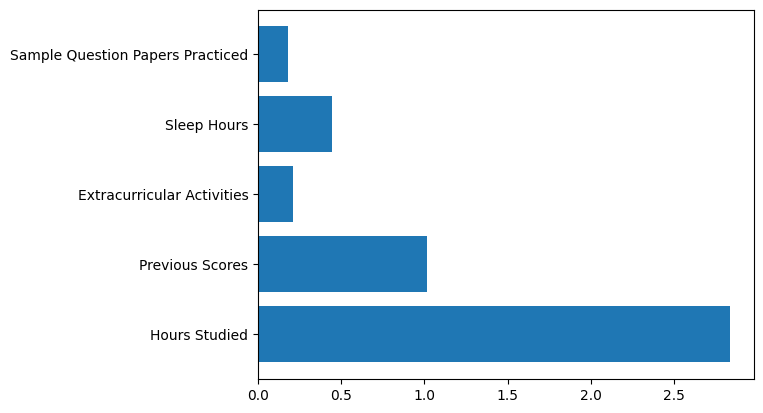

: 

In [ ]:
feature = student_performace.drop("Performance Index",axis=1).values
target = student_performace["Performance Index"].values

names = student_performace.drop("Performance Index",axis=1).columns
lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(feature,target).coef_

plt.barh(names,lasso_coef)
plt.show()